# Homework Assignment: Homework #2 - Machine Learning with Python

Due Date: November 2, 2023, at 11:59 PM

# COVID-19

The infectious disease known as Coronavirus disease 2019 (COVID-19) is caused by the severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). It was first detected in 2019 in Wuhan, China, and has subsequently spread worldwide, leading to the 2019–23 global coronavirus pandemic. Typical symptoms include fever, cough, and difficulty breathing. Muscle pain, production of sputum, and a sore throat are less frequently reported. The average fatality rate per diagnosed cases is 3.4%, varying from 0.2% among individuals under the age of 20 to approximately 15% among those aged over 80.

File naming convention

MM-DD-YYYY.csv in UTC.

Field description

Province/State: China - province name; US/Canada/Australia/ - city name, state/province name; Others - name of the event (e.g., "Diamond Princess" cruise ship); other countries - blank.
Country/Region: country/region name conforming to WHO (will be updated).
Last Update: MM/DD/YYYY HH:mm (24 hour format, in UTC).
Confirmed: the number of confirmed cases. For Hubei Province: from Feb 13 (GMT +8), we report both clinically diagnosed and lab-confirmed cases. For lab-confirmed cases only (Before Feb 17), please refer to who_covid_19_situation_reports. For Italy, diagnosis standard might be changed since Feb 27 to "slow the growth of new case numbers." (Source)
Deaths: the number of deaths.
Recovered: the number of recovered cases.
Update frequency
Files after Feb 1 (UTC): once a day around 23:59 (UTC).
Files on and before Feb 1 (UTC): the last updated files before 23:59 (UTC).
Using above dataset we have created some exercises on COVID-19 (Spread of the novel coronavirus, Analysis, Visualization, Prediction & Comparisons


## *1*. Write a Python program to display the first 5 rows from COVID-19 dataset. Also print the dataset information and count the number of the missing values for each column.


In [1]:
# Importing the pandas library as pd for data manipulation and analysis
import pandas as pd

# Reading the COVID-19 data from the provided URL using the read_csv function of pandas
covid_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-17-2020.csv')
# 前5個row的資料
print("First 5 rows of the COVID-19 dataset:")
print(covid_data.head())

# 資料集資訊
print("\nInformation about the COVID-19 dataset:")
print(covid_data.info())

# 計算每個columns中缺失值的數量
missing_values = covid_data.isnull().sum()
print("\nNumber of missing values in each column:")
print(missing_values)

First 5 rows of the COVID-19 dataset:
  Province/State Country/Region          Last Update  Confirmed  Deaths  \
0          Hubei          China  2020-03-17T11:53:10      67799    3111   
1            NaN          Italy  2020-03-17T18:33:02      31506    2503   
2            NaN           Iran  2020-03-17T15:13:09      16169     988   
3            NaN          Spain  2020-03-17T20:53:02      11748     533   
4            NaN        Germany  2020-03-17T18:53:02       9257      24   

   Recovered  Latitude  Longitude  
0      56003   30.9756   112.2707  
1       2941   41.8719    12.5674  
2       5389   32.4279    53.6880  
3       1028   40.4637    -3.7492  
4         67   51.1657    10.4515  

Information about the COVID-19 dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  154 non-null    object 
 1   Country/Re

## *2*. Write a Python program to get the latest number of confirmed, deaths, recovered and active cases of Novel Coronavirus (COVID-19) Country wise.

In [2]:
# Importing the pandas library as pd for data manipulation and analysis
import pandas as pd

# Reading the COVID-19 data from the provided URL using the read_csv function of pandas
covid_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-17-2020.csv')

# 檢查是否有同時重複'Country/Region', 'Province/State'
duplicates = covid_data.duplicated(subset=['Country/Region', 'Province/State'])
duplicates_rows = covid_data[duplicates]
if duplicates_rows.empty:
  print('All data are the latest data for each country and province.')
else:
  print('Dataset may contain old data.')

# 根據'Country/Region'總和資料
result = covid_data.groupby('Country/Region').sum().reset_index()
# 計算正在活躍的確診病例(確診-死亡-康復=活躍病例數)
result['Active'] = result['Confirmed'] - result['Deaths'] - result['Recovered']
# 列出需要展示的columns
require_col = ['Country/Region','Confirmed','Deaths','Recovered','Active']
result = result[require_col]
print(result)

All data are the latest data for each country and province.
                     Country/Region  Confirmed  Deaths  Recovered  Active
0                       Afghanistan         26       0          1      25
1                           Albania         55       1          0      54
2                           Algeria         60       4         12      44
3                           Andorra         39       0          1      38
4                        Antarctica          0       0          0       0
..                              ...        ...     ...        ...     ...
163                      Uzbekistan         10       0          0      10
164                       Venezuela         33       0          0      33
165                         Vietnam         66       0         16      50
166            Winter Olympics 2022          0       0          0       0
167  occupied Palestinian territory          0       0          0       0

[168 rows x 5 columns]


<ipython-input-2-bc1e1b1f1f92>:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result = covid_data.groupby('Country/Region').sum().reset_index()


## *3*. Write a Python program to get the Chinese province wise cases of confirmed, deaths and recovered cases of Novel Coronavirus (COVID-19).

In [3]:
# Importing the pandas library as pd for data manipulation and analysis
import pandas as pd

# Reading the COVID-19 data from the provided URL using the read_csv function of pandas
covid_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-17-2020.csv')

# 只保留'Country/Region'為China的資料
China = covid_data[(covid_data['Country/Region'] == 'China')]
# 列出需要展示的columns
require_col = ['Country/Region','Province/State','Confirmed','Deaths','Recovered']
China = China[require_col].reset_index(drop=True)
China = China.drop(33)#因為這列的省份為Unknown，且所有數值皆為0，因此刪除
print(China)

   Country/Region  Province/State  Confirmed  Deaths  Recovered
0           China           Hubei      67799    3111      56003
1           China       Guangdong       1364       8       1307
2           China           Henan       1273      22       1250
3           China        Zhejiang       1232       1       1216
4           China           Hunan       1018       4       1014
5           China           Anhui        990       6        984
6           China         Jiangxi        935       1        934
7           China        Shandong        761       7        746
8           China         Jiangsu        631       0        631
9           China       Chongqing        576       6        570
10          China         Sichuan        540       3        520
11          China    Heilongjiang        482      13        456
12          China         Beijing        456       8        369
13          China        Shanghai        358       3        325
14          China           Hebei       

## *4*.  Write a Python program to get the latest country wise deaths cases $> 0$ of Novel Coronavirus (COVID-19).

In [4]:
# Importing the pandas library as pd for data manipulation and analysis
import pandas as pd

# Reading the COVID-19 data from the provided URL using the read_csv function of pandas
covid_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-17-2020.csv')

# 根據'Country/Region'總和資料
result = covid_data.groupby('Country/Region').sum().reset_index()

# 篩選出deaths cases>0的Country/Region
filtered_result = result[(result['Deaths']>0)].reset_index(drop=True)#重置索引
require_col = ['Country/Region','Deaths']
filtered_result = filtered_result[require_col]
print(filtered_result)
print('Latest countries with >0 coronavirus (COVID-19) deaths including:\n',list(filtered_result['Country/Region']))

        Country/Region  Deaths
0              Albania       1
1              Algeria       4
2            Argentina       2
3            Australia       5
4              Austria       3
5           Azerbaijan       1
6              Bahrain       1
7              Belgium      10
8               Brazil       1
9             Bulgaria       2
10              Canada       6
11               China    3230
12         Cruise Ship       7
13             Denmark       4
14  Dominican Republic       1
15             Ecuador       2
16               Egypt       4
17             Finland       4
18              France     148
19             Germany      24
20              Greece       5
21           Guatemala       1
22              Guyana       1
23             Hungary       1
24             Iceland       1
25               India       3
26           Indonesia       5
27                Iran     988
28                Iraq      11
29             Ireland       2
30               Italy    2503
31      

<ipython-input-4-2600a8665057>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result = covid_data.groupby('Country/Region').sum().reset_index()


## *5*. Write a Python program to list countries with no cases of Novel Coronavirus (COVID-19) recovered.

In [5]:
# Importing the pandas library as pd for data manipulation and analysis
import pandas as pd

# Reading the COVID-19 data from the provided URL using the read_csv function of pandas
covid_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-17-2020.csv')

# 根據'Country/Region'總和資料
result = covid_data.groupby('Country/Region').sum().reset_index()

# 篩選出recovered=0的Country/Region
filtered_result = result[(result['Recovered']==0)].reset_index(drop=True)#重置索引
require_col = ['Country/Region','Recovered']
filtered_result = filtered_result[require_col]
print(filtered_result)
print('The countries with no cases of Novel Coronavirus (COVID-19) recovered including:\n', list(filtered_result['Country/Region']))

<ipython-input-5-fc0dca757a86>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result = covid_data.groupby('Country/Region').sum().reset_index()


                    Country/Region  Recovered
0                          Albania          0
1                       Antarctica          0
2              Antigua and Barbuda          0
3                            Aruba          0
4                         Barbados          0
..                             ...        ...
85                         Uruguay          0
86                      Uzbekistan          0
87                       Venezuela          0
88            Winter Olympics 2022          0
89  occupied Palestinian territory          0

[90 rows x 2 columns]
The countries with no cases of Novel Coronavirus (COVID-19) recovered including:
 ['Albania', 'Antarctica', 'Antigua and Barbuda', 'Aruba', 'Barbados', 'Benin', 'Bhutan', 'Bolivia', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Cameroon', 'Central African Republic', 'Chile', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', 'Cuba', 'Cyprus', 'Dominican Republic', 'Ecuador', 'Equatorial Guinea', 'Eswatini', 'Ethiopia', 'Fr

## *6*.  Write a Python program to list countries with all cases of Novel Coronavirus (COVID-19) died.

In [6]:
# Importing the pandas library as pd for data manipulation and analysis
import pandas as pd

# Reading the COVID-19 data from the provided URL using the read_csv function of pandas
covid_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-17-2020.csv')

# 根據'Country/Region'總和資料
result = covid_data.groupby('Country/Region').sum().reset_index()
require_col = ['Country/Region','Deaths']
result = result[require_col]
print(result)

                     Country/Region  Deaths
0                       Afghanistan       0
1                           Albania       1
2                           Algeria       4
3                           Andorra       0
4                        Antarctica       0
..                              ...     ...
163                      Uzbekistan       0
164                       Venezuela       0
165                         Vietnam       0
166            Winter Olympics 2022       0
167  occupied Palestinian territory       0

[168 rows x 2 columns]


<ipython-input-6-218d0f9bca05>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result = covid_data.groupby('Country/Region').sum().reset_index()


## *7*. Write a Python program to list countries with all cases of Novel Coronavirus (COVID-19) recovered.

In [7]:
# Importing the pandas library as pd for data manipulation and analysis
import pandas as pd

# Reading the COVID-19 data from the provided URL using the read_csv function of pandas
covid_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-17-2020.csv')

# 根據'Country/Region'總和資料
result = covid_data.groupby('Country/Region').sum().reset_index()
require_col = ['Country/Region','Recovered']
result = result[require_col]
print(result)

                     Country/Region  Recovered
0                       Afghanistan          1
1                           Albania          0
2                           Algeria         12
3                           Andorra          1
4                        Antarctica          0
..                              ...        ...
163                      Uzbekistan          0
164                       Venezuela          0
165                         Vietnam         16
166            Winter Olympics 2022          0
167  occupied Palestinian territory          0

[168 rows x 2 columns]


<ipython-input-7-fa3a5da4c7d1>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result = covid_data.groupby('Country/Region').sum().reset_index()


## *8*. Write a Python program to get the top 10 (by Confirmed) countries data (Last Update, Country/Region, Confirmed, Deaths, Recovered) of Novel Coronavirus (COVID-19).

In [8]:
# Importing the pandas library as pd for data manipulation and analysis
import pandas as pd

# Reading the COVID-19 data from the provided URL, selecting specific columns, and storing it in the 'covid_data' DataFrame
covid_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-18-2020.csv', usecols=['Last Update', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered'])

require_col = ['Last Update','Country/Region','Confirmed','Deaths','Recovered']
# 依照'Confirmed'由大到小排序
result = covid_data.sort_values(by='Confirmed', ascending=False)
result = result[require_col].head(10)
print(result)

           Last Update  Country/Region  Confirmed  Deaths  Recovered
0  2020-03-18T12:13:09           China      67800    3122      56927
1  2020-03-18T17:33:05           Italy      35713    2978       4025
2  2020-03-18T12:33:02            Iran      17361    1135       5389
3  2020-03-18T13:13:13           Spain      13910     623       1081
4  2020-03-18T19:33:02         Germany      12327      28        105
5  2020-03-18T18:33:02          France       9043     148         12
6  2020-03-18T02:53:03    Korea, South       8413      84       1540
7  2020-03-18T14:53:05     Switzerland       3028      48         15
8  2020-03-18T14:53:05  United Kingdom       2626       2         65
9  2020-03-18T19:33:03              US       2495      16          0


## *9*. Write a Python program to create a plot (lines) of total deaths, confirmed, recovered and active cases Country wise where deaths greater than 150.

   Country/Region  Deaths  Confirmed  Recovered  Active
0           China    3230      81058      68798    9030
1            Iran     988      16169       5389    9792
2           Italy    2503      31506       2941   26062
3           Spain     533      11748       1028   10187
4  United Kingdom     217       1954         53    1684


<ipython-input-9-474501fed2d7>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result = covid_data.groupby('Country/Region').sum().reset_index()


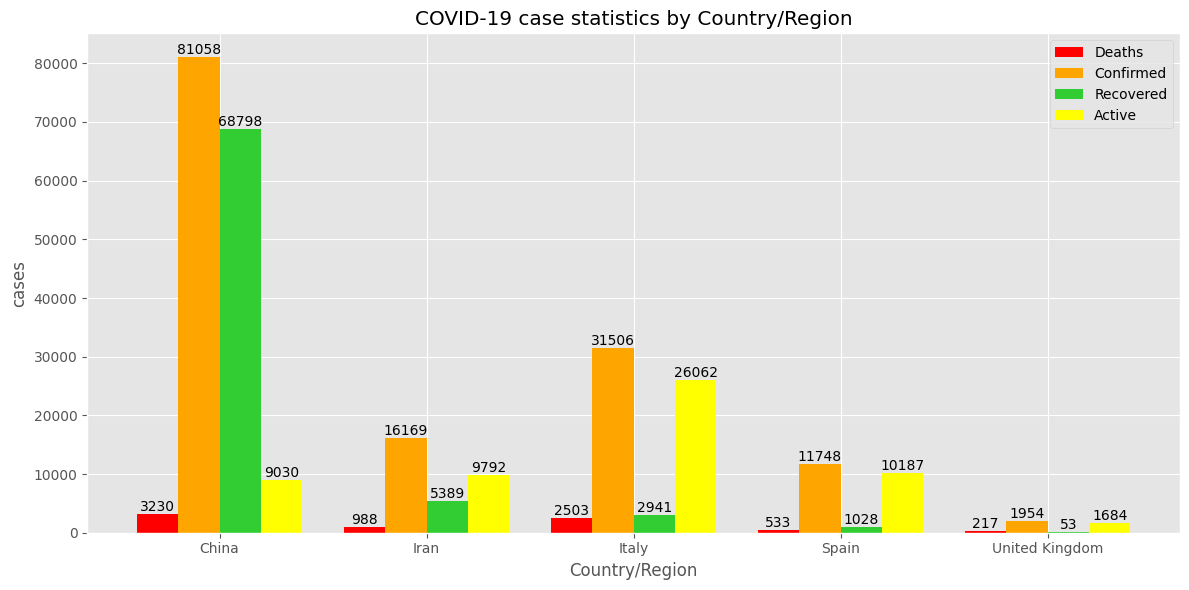

In [9]:
# Importing the pandas library as pd for data manipulation and analysis
# Importing the pyplot module from matplotlib library as plt for data visualization
import pandas as pd
import matplotlib.pyplot as plt

# Reading the COVID-19 data from the provided URL and storing it in the 'covid_data' DataFrame
covid_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-17-2020.csv')

# 根據'Country/Region'總和資料
result = covid_data.groupby('Country/Region').sum().reset_index()
# 篩選出deaths cases>150的Country/Region
filtered_result = result[(result['Deaths']>150)].reset_index(drop=True)#重置索引
# 計算正在活躍的確診病例(確診-死亡-康復=活躍病例數)
filtered_result['Active'] = filtered_result['Confirmed']-filtered_result['Deaths']-filtered_result['Recovered']
require_col = ['Country/Region','Deaths','Confirmed','Recovered','Active']
filtered_result = filtered_result[require_col]
print(filtered_result)

##plot
plt.style.use('ggplot')

# 取得參數
countries = filtered_result['Country/Region']
deaths = filtered_result['Deaths']
confirmed = filtered_result['Confirmed']
recovered = filtered_result['Recovered']
active = filtered_result['Active']

# 設定圖表大小
plt.figure(figsize=(12, 6))
# 繪製多長條圖
width = 0.2
x = range(len(countries))
bars1 = plt.bar(x, deaths, width, label='Deaths', color='red')
bars2 = plt.bar([i + width for i in x], confirmed, width, label='Confirmed', color='orange')
bars3 = plt.bar([i + 2 * width for i in x], recovered, width, label='Recovered', color='limegreen')
bars4 = plt.bar([i + 3 * width for i in x], active, width, label='Active', color='yellow')
# 設定X軸標籤
plt.xlabel('Country/Region')
plt.xticks([i + 1.5 * width for i in x], countries)
# 設定Y軸標籤
plt.ylabel('cases')
# 標題
plt.title('COVID-19 case statistics by Country/Region')
# 圖例
plt.legend()
# 加上實際數值
for bar1, bar2, bar3, bar4, death, confirm, recover, act in zip(bars1, bars2, bars3, bars4, deaths, confirmed, recovered, active):
    plt.text(bar1.get_x() + bar1.get_width() / 2, death, f'{death}', ha='center', va='bottom')
    plt.text(bar2.get_x() + bar2.get_width() / 2, confirm, f'{confirm}', ha='center', va='bottom')
    plt.text(bar3.get_x() + bar3.get_width() / 2, recover, f'{recover}', ha='center', va='bottom')
    plt.text(bar4.get_x() + bar4.get_width() / 2, act, f'{act}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


## *10*. Write a Python program to visualize the state/province wise death cases $(>0)$ of Novel Coronavirus (COVID-19) in the USA.

   Country/Region  Province/State  Deaths
0              US        New York      13
1              US      Washington      55
2              US      California      12
3              US      New Jersey       3
4              US         Florida       6
5              US       Louisiana       4
6              US        Illinois       1
7              US        Colorado       2
8              US         Georgia       1
9              US           Texas       1
10             US        Virginia       2
11             US          Oregon       1
12             US          Nevada       1
13             US  South Carolina       1
14             US         Indiana       2
15             US        Kentucky       1
16             US          Kansas       1
17             US    South Dakota       1


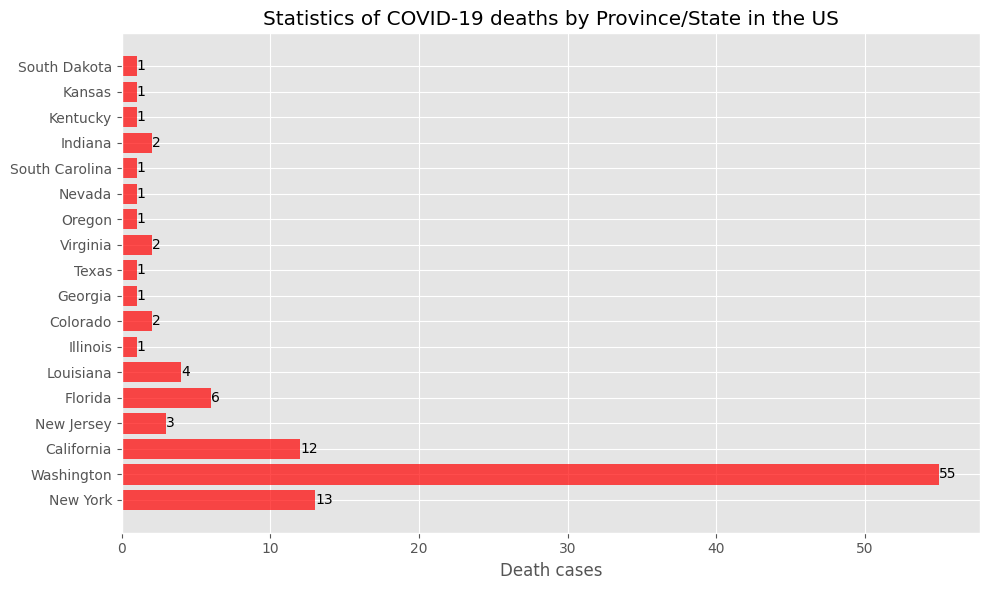

In [10]:
# Importing the pandas library as pd for data manipulation and analysis
# Importing the plotly express module as px for interactive data visualization
import pandas as pd
import plotly.express as px

# Reading the COVID-19 data from the provided URL and storing it in the 'covid_data' DataFrame
covid_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-17-2020.csv')

# 只保留'Country/Region'為US的資料
US = covid_data[(covid_data['Country/Region'] == 'US')]
filtered_US = US[(US['Deaths']>0)].reset_index(drop=True)#重置索引
# 列出需要展示的columns
require_col = ['Country/Region','Province/State','Deaths']
filtered_US = filtered_US[require_col].reset_index(drop=True)
print(filtered_US)

##plot
# 設定圖表大小
plt.figure(figsize=(10, 6))
# 取得'Province/State' 和 'Deaths'的數據
provinces = filtered_US['Province/State']
deaths = filtered_US['Deaths']
# 繪圖
bars = plt.barh(provinces, deaths, color='red', alpha=0.7)
# X軸標籤
plt.xlabel('Death cases')
# 圖表標題
plt.title('Statistics of COVID-19 deaths by Province/State in the US')
# 加上實際數值
for bar, death in zip(bars, deaths):
    plt.text(death, bar.get_y() + bar.get_height() / 2, f'{death}', ha='left', va='center', color='black')

plt.tight_layout()
plt.show()